# Domácí úkol SPI - 1. úloha
vypracoval David Pokorný (pokord11)
## načtení vstupů, import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import scipy.stats
from scipy.stats import chi2

K = 13
L = 7
X = ((K*L*23) % (20)) + 1
Y = ((X + ((K*5 + L*7) % (19))) % (20)) + 1
Xstr = '{:03d}'.format(X) + ".txt"
Ystr = '{:03d}'.format(Y) + ".txt"
print("Datový soubor:\nX =", Xstr , "\nY =", Ystr )

Xdata = open(Xstr, "r").read().replace(chr(10),chr(32))
Ydata = open(Ystr, "r").read().replace(chr(10),chr(32))

XdataSlova = Xdata.split()
YdataSlova = Ydata.split()

XdataPismena = list( Xdata.replace(" ", "").replace(",", "") )
YdataPismena = list( Ydata.replace(" ", "").replace(",", "") )

XdataZnaky = list( Xdata )
YdataZnaky = list( Ydata )

Datový soubor:
X = 014.txt 
Y = 015.txt


## (1b) Z obou datových souborů načtěte texty k analýze. Pro každý text zvlášť odhadněte pravděpodobnosti znaků (symbolů včetně mezery), které se v textech vyskytují. Výsledné pravděpodobnosti graficky znázorněte.

In [2]:
data_all = np.zeros((2,128), dtype=np.float)
symbols = [chr(x) for x in range(128)]

for symbol in XdataZnaky: data_all[0][ ord(symbol) ] += 1;
for symbol in YdataZnaky: data_all[1][ ord(symbol) ] += 1;
data_all[0] = data_all[0] / len(XdataZnaky)
data_all[1] = data_all[1] / len(YdataZnaky)

data = []
for i in range(0,128):
    if(data_all[0][i] != 0 or data_all[1][i] != 0):
        data.append([ i, data_all[0][i], data_all[1][i] ])

data = np.array(data).T
symbols = [chr(int(i)) for i in data[0]]

print("Počet symbolů:", len(symbols))

tit = ["Symbol", "ASCII Code", "Pst v X", "Pst v Y"]
table = np.array([symbols, data[0], data[1], data[2]]).T
print( tabulate( table ,headers=tit ) )

plt.figure(figsize=(12, 8))
plt.plot(symbols, data[1], "bo", symbols, data[2], "ro")
plt.legend(["data X","data Y"])
plt.title("Graf pravděpodobností jednotlivých znaků")
plt.show()

Počet symbolů: 35
Symbol      ASCII Code      Pst v X      Pst v Y
--------  ------------  -----------  -----------
                    32  0.182469     0.202543
,                   44  0.000159084  0
A                   65  0.000159084  0
B                   66  0            0.000187021
C                   67  0.000318167  0
D                   68  0.000159084  0
J                   74  0            0.000187021
K                   75  0            0.000187021
T                   84  0.000318167  0.000187021
a                   97  0.0677696    0.0740602
b                   98  0.0125676    0.00860295
c                   99  0.0194082    0.00822891
d                  100  0.0375437    0.0600337
e                  101  0.104359     0.116327
f                  102  0.0214763    0.0231906
g                  103  0.0155902    0.0261829
h                  104  0.0537703    0.0654573
i                  105  0.0526567    0.0456331
j                  106  0.00111359   0.000187021
k            

Je vidět, že s největší pravděpodobností se v textu vyskytuje samotná mezera. Mezi znaky abecedy je nejčastější 'e', které je v anglickém textu velmi časté. Malou pravděpodobnost mají velká písmena, která se nacházejí pouze v titulku textu. 

## (1b) Pro každý text zvlášť spočtěte entropii odhadnutého rozdělení znaků.

In [3]:
def entropy(vector):
    np.seterr(divide = 'ignore') 
    log = np.log2( vector )
    log[ np.isneginf(log) ] = 0
    np.seterr(divide = 'warn') 
    return -np.sum( vector * log )
    
Xentropy = entropy(data[1])
Yentropy = entropy(data[2])

print("Entropie X:", Xentropy)
print("Entropie Y:", Yentropy)

Entropie X: 4.08290693046033
Entropie Y: 3.933641086034618


První text má entropii větší. Rozdíl hodnot entropie není vysoký, což bychom od různých textů v jednom jazyce čekali. 

## (2b) Nalezněte optimální instantní kód CC pro kódování znaků jednoho z textů.

In [4]:
def popMin(data, pst):
    minimal = np.argmin(pst)
    d = data.pop(minimal)
    p = pst.pop(minimal)
    return (d, p)

new_symbols = [chr(int(i)) for i in data[0] ]
new_pst = list(data[1])
    
while(len(new_symbols) != 1):
    (znak1, pst1) = popMin(new_symbols, new_pst)
    (znak2, pst2) = popMin(new_symbols, new_pst)
    new_symbols.append( [znak1 , znak2] )
    new_pst.append( pst1 + pst2 )

    
kod = {}
def rec_kod(slovo, mnozina):
    if(isinstance(mnozina, list)):
        rec_kod(slovo+"0", mnozina[0])
        rec_kod(slovo+"1", mnozina[1])
    else:
        kod[mnozina] = slovo

rec_kod("",new_symbols[0])

kod_list = [[znak,kod[znak]] for znak in kod]
tit = ["Symbol", "Kódové slovo"]
print( tabulate( kod_list ,headers=tit ) )

Symbol       Kódové slovo
--------  ---------------
u                   00000
f                   00001
p                  000100
b                  000101
l                   00011
e                     001
i                    0100
r                    0101
s                    0110
h                    0111
n                    1000
o                    1001
y                  101000
g                  101001
v                 1010100
T             10101010000
z             10101010001
A            101010100100
D            101010100101
K          10101010011000
B         101010100110010
J         101010100110011
,           1010101001101
C            101010100111
j              1010101010
q             10101010110
x             10101010111
k                10101011
m                  101011
a                    1011
t                    1100
d                   11010
c                  110110
w                  110111
                      111


Zde vidíme, že pro písmena s menší pravděpodobností (velká písmena) je kódové slovo delší. S větší pravděpodobností nám klesá délka kódového slova. Kódování je optimální díky algortimu, pomocí kterého jsme kód vytvořili (Huffmanovo kódování).

## (2b) Pro každý text zvlášť spočtěte střední délku kódu CC a porovnejte ji s entropií rozdělení znaků.

In [5]:
Xzakodovane = "".join([kod[i] for i in XdataZnaky])
Xdelka = len(Xzakodovane)
XstredniDelka = Xdelka / len(XdataZnaky)

Yzakodovane = "".join([kod[i] for i in YdataZnaky])
Ydelka = len(Yzakodovane)
YstredniDelka = Ydelka / len(YdataZnaky)

tit = ["Náhodná veličina", "Entropie textu", "Střední délka kódu"]
table = [["X", Xentropy, XstredniDelka],["Y", Yentropy, YstredniDelka]]
print( tabulate( table ,headers=tit ) )

Náhodná veličina      Entropie textu    Střední délka kódu
------------------  ----------------  --------------------
X                            4.08291               4.11899
Y                            3.93364               4.0475


V obou případěch je entropie kódu o trochu větší než entropie textu, ale ne o víc než 1. Střední délka našeho optimálního kódu tedy splňuje větu o střední délce optimálního kódu (věta 6.14).

# Úloha 2
## (1b) Z obou datových souborů načtěte texty k analýze. Pro každý text zvlášť odhadněte základní charakteristiky délek slov, tj. střední hodnotu a rozptyl. Graficky znázorněte rozdělení délek slov.

Náhodná veličina      Střední hodnota    Výběrový rozptyl    Výběrová střední odchylka
------------------  -----------------  ------------------  ---------------------------
X                             4.47648             5.66757                      2.38066
Y                             3.93358             2.66902                      1.63371


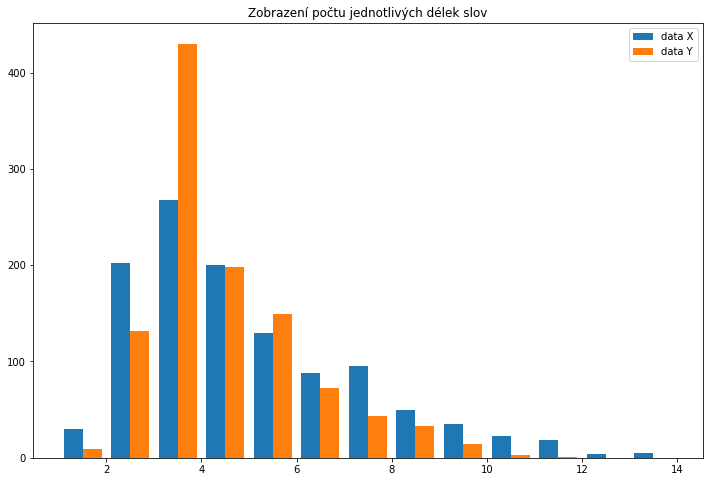

In [6]:
XdelkySlov = [len(x) for x in XdataSlova]
YdelkySlov = [len(x) for x in YdataSlova]

tit = ["Náhodná veličina", "Střední hodnota", "Výběrový rozptyl", "Výběrová střední odchylka"]
table = [
    ["X", np.mean(XdelkySlov), np.var(XdelkySlov), np.sqrt(np.var(XdelkySlov))],
    ["Y", np.mean(YdelkySlov), np.var(YdelkySlov), np.sqrt(np.var(YdelkySlov))]
]
print( tabulate( table ,headers=tit ) )

plt.figure(figsize=(12, 8))
plt.hist( (XdelkySlov,YdelkySlov), bins=13, range=(1,14))
plt.legend(["data X","data Y"])
plt.title("Zobrazení počtu jednotlivých délek slov")
plt.show()

Modus délky slov je v obou textech roven 3. To je pochopitelné, díky neurčitému členu "the" a spojce "and", jež jsou dokonce nejčastější slova v textech.

## (1b) Pro každý text zvlášť odhadněte pravděpodobnosti písmen (symbolů mimo mezery), které se v textech vyskytují. Výsledné pravděpodobnosti graficky znázorněte.

In [7]:
data_all = np.zeros((2,128), dtype=np.float)
symbols = [chr(x) for x in range(128)]

for symbol in XdataPismena: data_all[0][ ord(symbol) ] += 1;
for symbol in YdataPismena: data_all[1][ ord(symbol) ] += 1;
data_all[0] = data_all[0] / len(XdataPismena)
data_all[1] = data_all[1] / len(YdataPismena)


data = []
for i in range(0,128):
    if(data_all[0][i] != 0 or data_all[1][i] != 0):
        data.append([ i, data_all[0][i], data_all[1][i] ])

data = np.array(data).T
symbols = [chr(int(i)) for i in data[0]]

print("Počet symbolů:", len(symbols))

tit = ["Symbol", "ASCII Code", "Pst v X", "Pst v Y"]
table = np.array([symbols, data[0], data[1], data[2]]).T
print( tabulate( table ,headers=tit ) )

plt.figure(figsize=(12, 8))
plt.plot(symbols, data[1], "bo", symbols, data[2], "ro")
plt.legend(["data X","data Y"])
plt.title("Graf pravděpodobností jednotlivých znaků")
plt.show()

Počet symbolů: 33
Symbol      ASCII Code      Pst v X      Pst v Y
--------  ------------  -----------  -----------
A                   65  0.000194628  0
B                   66  0            0.000234522
C                   67  0.000389257  0
D                   68  0.000194628  0
J                   74  0            0.000234522
K                   75  0            0.000234522
T                   84  0.000389257  0.000234522
a                   97  0.0829116    0.0928705
b                   98  0.0153756    0.010788
c                   99  0.0237446    0.0103189
d                  100  0.0459323    0.0752814
e                  101  0.127676     0.145872
f                  102  0.0262748    0.0290807
g                  103  0.0190736    0.032833
h                  104  0.0657844    0.0820826
i                  105  0.064422     0.0572233
j                  106  0.0013624    0.000234522
k                  107  0.00700662   0.00515947
l                  108  0.0334761    0.0297842
m      

Je patrné, že hodnoty pravděpodobností se u jednotlivých písmen napříč texty tolik neliší. Pokud má písmeno vysokou pravděpodobnost v jednom textu, pak ji má i vysokou v druhém textu.

## (1.5b) Na hladině významnosti 5% otestujte hypotézu, že rozdělení délek slov nezávisí na tom, o který jde text. Určete také p-hodnotu testu.

- Mám náhodné veličiny Y a Z, kde Y jsou délky slov v textu a Z je číslo textu, ve kterém se slovo nacházelo.
- Testuji, zda náhodné veličiny Y a Z jsou nezávislé. 

$H_0: p_{ij} = p_{i•}p_{•j}$, pro každé i, j 

statistika: $\sum \cfrac{(p_{ij} - p_{i•} \cdot p_{•j})^2 }{p_{i•} \cdot p_{•j}}\cdot n$
    

In [8]:
maxSize = np.max(XdelkySlov+YdelkySlov)
minSize = np.min(XdelkySlov+YdelkySlov)
#print("max/min size:",maxSize,"/",minSize)
n = (len(XdelkySlov) + len(YdelkySlov))

kontTable = np.zeros( (2,maxSize-minSize+1), dtype=float )
for x in XdelkySlov: kontTable[0][x-minSize] += 1
for y in YdelkySlov: kontTable[1][y-minSize] += 1
kontY = np.sum(kontTable, axis=0) 
kontZ = np.sum(kontTable, axis=1) 

stupen_volnosti = (len(kontY)-1)*(len(kontZ)-1)
print("stupen volnosti:\t", stupen_volnosti)

statistika = np.sum([ ((kontTable[i][j]-kontY[j]*kontZ[i]/n)**2)/(kontY[j]*kontZ[i]/n) for j in range(len(kontY)) for i in range(len(kontZ))])
chi = chi2.isf(q=0.05, df=stupen_volnosti)
print("statistika:\t\t",statistika)
print("chi2:\t\t\t", chi)

pvalue = chi2.sf(statistika,stupen_volnosti)
print("p-hodnota:\t\t",pvalue)

stupen volnosti:	 13
statistika:		 136.42947957451813
chi2:			 22.362032494826945
p-hodnota:		 1.090805703881732e-22


Jelikož p-hodnota je nižší, než naše hladina, pak zamítáme nulovou hypotézu. Je zde ovšem potřeba ještě zkontrolovat, zda máme dostatečné množství dat, aby mělo moje vyhodnocení váhu. Dle přednášky se udává, že by pro každou kategorii mělo platit n*p<sub>i</sub> >= 5. Pro zástupce jednotlivých textů máme dat jistě hodně, ale vypišme si tyto hodnoty pro délky slov.

In [9]:
print(kontY)

[ 39. 334. 698. 398. 279. 160. 138.  83.  49.  26.  19.   4.   3.   2.]


Pro poslední 3 délky slov se dostávám pod hranici 5. Proto je sloučím a budu mít kategorie délek slov 2, 3, ..., 10, 11+.
Celé testování provedu znova. Tentokrát použiji funkci ze scipy.

In [10]:
maxSize = 11
minSize = np.min(XdelkySlov+YdelkySlov)
#print("max/min size:",maxSize,"/",minSize)
n = (len(XdelkySlov) + len(YdelkySlov))

kontTable = np.zeros( (2,maxSize-minSize+1), dtype=float )
for x in XdelkySlov: kontTable[0][min(x-minSize, maxSize-minSize)] += 1
for y in YdelkySlov: kontTable[1][min(y-minSize, maxSize-minSize)] += 1
    
(statistika, pvalue, stupen_volnosti, expected_val) = scipy.stats.chi2_contingency(kontTable)

print("stupen volnosti:\t", stupen_volnosti)
print("statistika:\t\t",statistika)
print("chi2:\t\t\t", chi2.isf(q=0.05, df=stupen_volnosti))
print("p-hodnota:\t\t",pvalue)

stupen volnosti:	 10
statistika:		 136.3617547189667
chi2:			 18.30703805327515
p-hodnota:		 2.3426584671733337e-24


Nyní dostáváme ještě silnější zamítnutí. Rozložení slov závisí na textu.

Pro zajímavost si ještě ukažme jaké rozložení délek slov by měl mít text podle marginálních rozdělení (oproti našim textům).

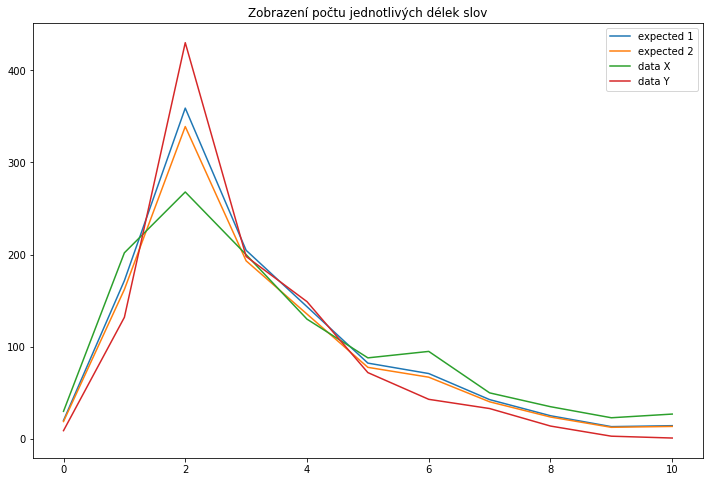

In [11]:
data = np.array([expected_val[0],expected_val[1],kontTable[0],kontTable[1]])

plt.figure(figsize=(12, 8))
plt.plot( data.T )
plt.legend(["expected 1","expected 2", "data X","data Y"])
plt.title("Zobrazení počtu jednotlivých délek slov")
plt.show()

Hlavní závislost tedy vzniká v počtu slov délky 2. Pokud budu mít slovo z data Y, pak je větší pravděpodobnost, že délky 2.

## ~~(1.5b) Na hladině významnosti 5\% otestujte hypotézu, že se střední délky slov v obou textech rovnají. Určete také p-hodnotu testu.~~ - opraveno na konci

Co máme:
- dva texty se slovy
- multinomické rozdělení, kde kategorie tvoří délky slov

Co (ne)víme:
- asymptoticky jde pearsonova statistika k chi2
- neznáme střední hodnotu a rozptyl
- délky slov jsou závislé na textu

Střední délka jedné kategorie: EN<sub>i</sub> = np<sub>i</sub>. Testujeme, zda jsou tyto čísla pro oba texty stejná.
Zkusím tedy spočítat střední hodnoty pro jeden text a použít je jako teoretické střední hodnoty pro testování. Pokud mají střední hodnoty stejné, pak nezamítnu H<sub>0</sub>.

Přesněji použiju pravděpodobnosti z textu X, které přenásobím počtem slov v textu Y. Tím dostanu teoretickou střední hodnotu Y textu, kterou použiji k vyhodnocení testové statistiky.

Jelikož zde není žádný parametr, který bych odhadoval, pak použiju jako stupeň volnosti (počet kategorií - 1).

In [12]:
n0 = np.sum(kontTable[0])
n1 = np.sum(kontTable[1])
pst1 = kontTable[1]/n1
n0pst1 = pst1 * n0 # teoretická střední hodnota, které by měla být stejná jako výběrová pro daný text

statistika = np.sum( ( ( kontTable[0]-n0pst1 )**2 ) / n0pst1 ) 
stupen_volnosti = len(kontTable[0])-1
pvalue = chi2.sf(statistika,stupen_volnosti)

print("stupen volnosti:\t", stupen_volnosti)
print("statistika:\t\t",statistika)
print("chi2:\t\t\t", chi2.isf(q=0.05, df=stupen_volnosti))
print("p-hodnota:\t\t",pvalue)

stupen volnosti:	 10
statistika:		 1002.6512566970023
chi2:			 18.30703805327515
p-hodnota:		 5.020956151371526e-209


Opět tedy tuto hypotézu zamítáme ve prospěch alternativní. Střední hodnoty délek slov nejsou stejné.

## (1b) Na hladině významnosti 5% otestujte hypotézu, že rozdělení písmen nezávisí na tom, o který jde text. Určete také p-hodnotu testu.

Test opět probíhá podle kontingenčních tabulek. Jedna veličina jsou písmena a druhá text. V kontigenční tabulce tedy máme na pozici (i, j) počet výskytu i-tého písmena v j-tém textu. 

In [13]:
n = (len(XdataPismena + YdataPismena))

kontTable = np.zeros( (2,128), dtype=float )
for symbol in XdataZnaky: kontTable[0][ ord(symbol) ] += 1;
for symbol in YdataZnaky: kontTable[1][ ord(symbol) ] += 1;
    
#odeberu znaky, které nejsou v žádném textu
r = kontTable.T
r = r[~np.all(r == 0, axis=1)]
kontTable = r.T

(statistika, pvalue, stupen_volnosti, expected_val) = scipy.stats.chi2_contingency(kontTable)

print("stupen volnosti: ", stupen_volnosti)
print("statistika - chi2 pro 5%:\t", statistika ,"-" , chi2.isf(q=0.05, df=stupen_volnosti))
print("p-hodnota:", pvalue)

stupen volnosti:  34
statistika - chi2 pro 5%:	 211.74359545267313 - 48.60236736729417
p-hodnota: 1.4677309434414722e-27


Zde opět zamítáme možnost, že je rozdělení písmen je nezávislé na textu. 

## (1.5b) Na hladině významnosti 5\% otestujte hypotézu, že se střední délky slov v obou textech rovnají. Určete také p-hodnotu testu. - oprava

K testování volím dvouvýběrový t-test. Mám tedy $X_1$ pro délky slov prvního textu a $X_2$ pro délky slov druhého testu.

Moje hypotézy jsou:
$H_0: \mu_{X_1} = \mu_{X_2}$, oproti $H_a:\mu_{X_1} \neq \mu_{X_2}$

K testování využiji funkci scipy.stats.ttest_ind, který používá (pro equal_var=True a rozdílné délky naměřených hodnot) následující test:

$T = \frac{\bar {X}_1 - \bar{X}_2}{s_p \cdot \sqrt{\frac{1}{n_1}+\frac{1}{n_2}}}$, kde $s_p = \sqrt{\frac{\left(n_1-1\right)s_{X_1}^2+\left(n_2-1\right)s_{X_2}^2}{n_1+n_2-2}}$

Stupen volnosti používá $n_1+n_2-2$.

Dokumentace: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

In [28]:
X = [len(x) for x in XdataSlova]
Y = [len(x) for x in YdataSlova]

scipy.stats.ttest_ind(X, Y, equal_var=True)  

Ttest_indResult(statistic=6.243924987508852, pvalue=5.093575423617729e-10)

Jelikož je p-hodnota značně nižší, pak nulovou hypotézu zamítáme ve prospěch alternativní. 